In [121]:
##Import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
%matplotlib inline

In [120]:
#Reading the dataset
kc_df = pd.read_csv('kc_house_data-1.csv')

In [122]:
#Date field has other data. Need to fix
kc_df['date'].head(10)

0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
5    20140512T000000
6    20140627T000000
7    20150115T000000
8    20150415T000000
9    20150312T000000
Name: date, dtype: object

In [123]:
#Transforming the date field
kc_df['sold_year'] = kc_df['date'].apply(lambda x: x[:4])

In [124]:
kc_df['sold_year'] = kc_df['sold_year'].astype(int)

In [125]:
pd.set_option('display.max_columns', 500)
kc_df = kc_df.drop(['id','date'],axis=1)
kc_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sold_year
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,-0.009838
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,-0.026596
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,-0.030387


In [26]:
# insight: each of the following features has strong correlation with each other. We need to drop them
#sqft_living ~ bathrooms
#sqft_living ~ grade sqft_above sqft_living15
#sqft_lot ~ sqft_lot15
#grade ~ sqft_living sqft_above sqft_living15


In [126]:
kc_df = kc_df.drop(['sqft_lot15','sqft_living15','sqft_above','bathrooms'],axis=1)

In [127]:
kc_df.corr()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sold_year
price,1.000000,0.308350,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.003576
bedrooms,0.308350,1.000000,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,-0.009838
sqft_living,0.702035,0.576671,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,-0.029038
sqft_lot,0.089661,0.031703,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.005468
floors,0.256794,0.175429,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,-0.022315
waterfront,0.266369,-0.006582,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,-0.004165
view,0.397293,0.079532,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.001364
condition,0.036362,0.028472,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.045589
grade,0.667434,0.356967,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,-0.030387
sqft_basement,0.323816,0.303093,0.435043,0.015286,-0.245705,0.080588,0.276947,0.174105,0.168392,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,-0.015687


In [ ]:
#All multi-colinearity removed. rest of the features to be used for model creation

In [128]:
kc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01
sqft_basement,21613.0,291.509045,442.575043,0.0000,0.000,0.0000,560.000,4.820000e+03


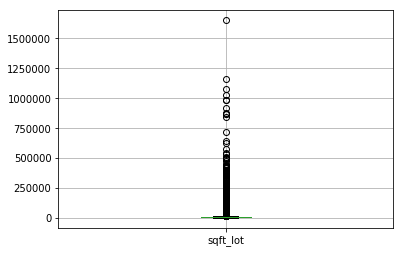

In [129]:
# sqft_lot has outliers as the standard deviation is very high
kc_df.boxplot(column=['sqft_lot'])

In [130]:
# Removing all entires that has occurred less than 10 times.
threshold = 10 # Anything that occurs less than this will be removed.
for col in kc_df['sqft_lot']:
    value_counts = kc_df['sqft_lot'].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    kc_df['sqft_lot'].replace(to_remove, np.nan, inplace=True)

RecursionError: maximum recursion depth exceeded in comparison

In [143]:
# Not sure of the above error code. However all entires with frequency less than 10 are removed
kc_df['sqft_lot'].value_counts()

5000.0     358
6000.0     290
4000.0     251
7200.0     220
4800.0     120
7500.0     119
4500.0     114
8400.0     111
9600.0     109
3600.0     103
9000.0      93
3000.0      84
10688.0     79
5100.0      78
7000.0      76
8000.0      76
5500.0      73
8100.0      72
7800.0      69
4080.0      67
7700.0      66
7350.0      64
5200.0      64
5750.0      61
4400.0      56
5400.0      54
6600.0      52
6250.0      50
4200.0      49
7560.0      48
10000.0     46
10800.0     44
9750.0      43
8800.0      42
6500.0      40
6120.0      39
7210.0      38
2500.0      36
4600.0      34
8250.0      34
6300.0      32
5250.0      32
3200.0      31
10500.0     31
6380.0      31
5700.0      30
7620.0      30
10200.0     30
9900.0      29
5040.0      29
3800.0      28
15000.0     28
4750.0      27
5600.0      27
5120.0      27
7680.0      27
6750.0      26
10125.0     25
7920.0      25
3060.0      24
3750.0      24
11250.0     24
5650.0      23
7650.0      23
6400.0      23
6200.0      22
3400.0    

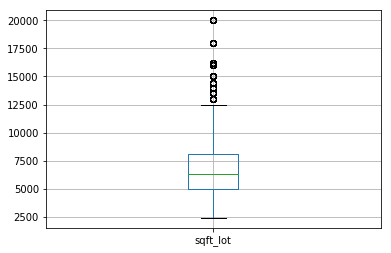

In [142]:
kc_df.boxplot(column=['sqft_lot'])

In [141]:
kc_df['sqft_lot'].max()

20000.0

In [140]:
# Clipping the max value of sqft_lot at 75% quatile value
kc_df['sqft_lot'] = kc_df['sqft_lot'].replace(kc_df['sqft_lot'].max(),10688.000)
#Removed all outliers from this field by running the above code multiple times

In [149]:
# Removing all null values
kc_df = kc_df.dropna()

In [150]:
kc_df.dtypes

price            float64
bedrooms           int64
sqft_living        int64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sold_year          int64
dtype: object

In [151]:
#defining the target variable
Y = kc_df['price']
X = kc_df.drop(['price'],axis=1)

In [152]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 5)

In [153]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
y_pred = linreg.predict(x_test)

In [154]:
print(linreg.score(x_test, y_test))
##The accuracy of the model is close to 71%

0.7100406090708039


In [ ]:
# Using KBinsDiscretizer

In [156]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer( n_bins = 10, strategy ='uniform', encode ='onehot-dense') 
kb.fit(x_train)

KBinsDiscretizer(encode='onehot-dense', n_bins=10, strategy='uniform')

In [157]:
xtr_binned = kb.transform(x_train)

In [158]:
linreg_bin = LinearRegression().fit(xtr_binned, y_train)

In [159]:
print(linreg_bin.score(xtr_binned, y_train))

0.8105609816069911


In [161]:
xte_binned = kb.transform(x_test)

In [162]:
print(linreg_bin.score(xte_binned, y_test))
#KBinsDiscretizer is giving higher %

0.7928372308111088


In [ ]:
# Polynomial feature transformation didn't execute in my PC. May be higher CPU or GPU is needed

In [163]:
exec(open("iv_function.py").read())
iv = information_value(df = X,target = Y)

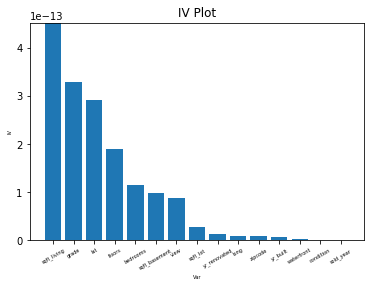

In [165]:
index = np.arange(len(iv.VAR_NAME))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(iv.VAR_NAME))
    plt.bar(index, iv.IV)
    plt.xlabel('Var', fontsize=5)
    plt.ylabel('IV', fontsize=5)
    plt.xticks(index, iv.VAR_NAME, fontsize=5, rotation=30)
    plt.title('IV Plot')
    plt.show()

plot_bar_x()  

In [ ]:
# From the above information graph it seems first 7 features would suffice for prediction

In [166]:
X.dtypes

bedrooms           int64
sqft_living        int64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sold_year          int64
dtype: object

In [167]:
kc_df1 = X.drop(['yr_renovated','yr_renovated','yr_built','long','zipcode','condition','sold_year','waterfront'],axis=1)

In [ ]:
#Performing linera regression again on the newly built features

In [168]:
x1_train, x1_test, y1_train, y1_test = train_test_split(kc_df1, Y, test_size=0.2, random_state = 5)

In [169]:
linreg1 = LinearRegression()
linreg1.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [170]:
print(linreg1.score(x1_test, y1_test))
##The accuracy of the model is close to 66%.

0.6630645970202032


In [ ]:
# This also is not better than the overall linear regression model. 